<a href="https://colab.research.google.com/github/souldrive7/ECP/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# サポートベクトルマシン

In [1]:
from sklearn.svm import SVC  # サポートベクトルマシン：クラス識別用（Support Vector Classifier）
from sklearn.datasets import fetch_openml  # データセットのダウンロード取得用
import pandas as pd  # データフレーム操作用
import matplotlib.pyplot as plt  # グラフ描画用

In [2]:
# 1. データセットの取得
dataset = fetch_openml("pima-indians-diabetes", version=1, as_frame=True)  # Pimaデータセットを取得
# こんな感じのデータです．8変数の説明変数．Outcomeは0 or 1
dataset.frame.head()  # データフレームの最初の5行を表示

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [3]:
# 1.1 参考までに相関行列を表示
corr = dataset.frame.corr()
# 相関行列をヒートマップで表示．有効数字2桁
corr.style.format(precision=2).background_gradient(cmap="coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [5]:
# こっちの方が汎用性が高いです．PandasのDataFrameから変換する方法
df = dataset.frame
X = df.drop(columns=["Outcome"])  # Outcome列を除外
y = df["Outcome"].astype(int)  # Outcome列を抽出 & 整数型に変換


In [6]:
# 3. 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split  # データ分割用
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)  # 80%訓練，20%テスト

In [8]:
# 4. SVCを使って学習
model = SVC(kernel="linear", C=1.0)  # 線形カーネル，C=1.0⇐使わないOに近いと、間違ってても精度重視
model.fit(X_train, y_train)  # 学習

SVC(kernel='linear')

In [9]:
# 5. テストデータで予測
y_pred = model.predict(X_test)  # 予測
# 6. 精度を評価
from sklearn.metrics import accuracy_score  # 精度評価用
accuracy = accuracy_score(y_test, y_pred)  # 精度計算
print(f"Accuracy: {accuracy:.3f}")  # 精度を表示(小数点以下3桁)

Accuracy: 0.792


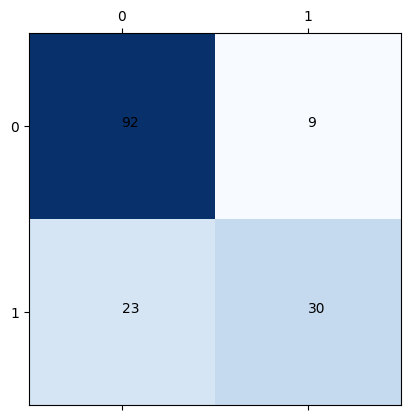

In [10]:
# 7. 混同行列を表示
from sklearn.metrics import confusion_matrix  # 混同行列用
cm = confusion_matrix(y_test, y_pred)  # 混同行列を計算
plt.matshow(cm, cmap="Blues")  # 混同行列をヒートマップで表示
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j])


In [11]:
# おまけ

# ipywidgetで dataset.feature_namesの8変数をスライダーで指定して，その変数の値を使って予測する
# 8. ipywidgetでスライダーを作成
from ipywidgets import interact, FloatSlider  # スライダー作成用
import numpy as np  # 数値計算用

# スライダーの範囲を指定
def create_slider(name, min_value, max_value):
    return FloatSlider(value=(min_value + max_value) / 2, min=min_value, max=max_value, step=0.1, description=name)

# スライダーの値を使って予測する関数
def predict_with_sliders(**kwargs):
    # スライダーの値を使って予測
    input_data = pd.DataFrame({name: [kwargs[name]] for name in dataset.feature_names})
    prediction = model.decision_function(input_data)  # 決定関数を計算
    # 決定関数をlikelihoodに変換
    prediction = 1 / (1 + np.exp(-prediction))  # ロジスティック関数を適用
    print(f"Prediction: {prediction[0]:.2f}")  # 予測結果を表示

# スライダーを作成
sliders = {name: create_slider(name, X[name].min(), X[name].max()) for name in dataset.feature_names}  # スライダーを作成

# スライダーを表示
interact(predict_with_sliders, **sliders)  # スライダーを表示


interactive(children=(FloatSlider(value=8.5, description='Pregnancies', max=17.0), FloatSlider(value=99.5, des…

<function __main__.predict_with_sliders(**kwargs)>